**DataSet** : https://www.kaggle.com/datasets/parisrohan/credit-score-classification

In [2]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st
import seaborn as sns

In [3]:
from imblearn.over_sampling import SMOTE              #Used to handle class imbalance
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
#Uploading a file
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [6]:
# from google.colab import files   To download a file
# files.download('sample.csv')

In [7]:
df=pd.read_csv('train.csv')

<ipython-input-7-120bfc8e56df>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv')


# UNDERSTANDING THE DATA

In [8]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Changing category -> as it is categorical data

In [11]:

cat_cols = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
df[cat_cols] = df[cat_cols].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

# Data Cleaning

Check null, Check Duplicates,Checking for unique values,Drop redundant columns

In [13]:
df.shape   #100000 examples with 28 features each

(100000, 28)

In [14]:
m,n=df.shape
print(m,n)

100000 28


In [15]:
# isna()
# Detect missing values.

In [16]:
missing=df.isna().sum()

In [17]:
missing       #The data has missing values

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [18]:
df.duplicated().sum()              #No duplicated values

0

In [19]:
df.nunique()       #Checking for unique values

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [20]:
df.drop(['ID', 'Name', 'SSN', 'Type_of_Loan'],axis=1,inplace=True)

In [21]:
df.head(2)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [22]:
df.shape                #As four columns are dropped

(100000, 24)

Handeling Catogerical variables random values

In [23]:

cl = list(df.select_dtypes('category'))

In [24]:
cl

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [25]:
for c in cl:
  print(c)
  print(df[c].value_counts())
  print("-----------------------------------------------")

Month
April       12500
August      12500
February    12500
January     12500
July        12500
June        12500
March       12500
May         12500
Name: Month, dtype: int64
-----------------------------------------------
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64
-----------------------------------------------
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64
-----------------------------------------------
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64
-----------------------------------------------
Payment_Behaviour
Low

In [26]:
# Credit_mix and Payment_Behaviour has few arbitary values

In [27]:
df['Credit_Mix']=df['Credit_Mix'].apply(lambda x: np.NaN if x=='_' else x)

In [28]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
Bad         18989
Name: Credit_Mix, dtype: int64

In [29]:
df['Payment_Behaviour']=df['Payment_Behaviour'].apply(lambda x: np.NaN if x=='!@9#%8' else x)

In [30]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

Handeling Numerical Values

In [31]:
cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt']

In [32]:
for c in cols:
  print(c)
  print(df[c].value_counts())
  print("--------------------------------------")

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64
--------------------------------------
Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64
--------------------------------------
Num_of_Loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: Num_of_Loan, Length: 434, dtype: int64
--------------------------------------
Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64
---------------

In [33]:
cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt']
for col in cols:
  df[col] = df[col].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                      else x.replace("_","")).replace("",np.nan)
  df[col] = df[col].astype('float')

Impute and clean

In [34]:
n=df.isna().sum()
print(n)

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64


**Monthly_Inhand_Salary column**

In [35]:
#There are different inhand sallary for same persons , so lets take the average

In [36]:
# This code calculates the mean of the 'Monthly_Inhand_Salary' column for each unique 'Customer_ID' and
# assigns the mean value to all rows with the same 'Customer_ID' in the 'Monthly_Inhand_Salary' column.
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda v: v.mean())
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].astype('float')

Num_of_Delayed_Payment column

In [37]:
# This code adds a new column called 'Num_of_Delayed_Payment' to the DataFrame 'df'.
#  The values in this column are filled with the previous non-null value for each customer.
#  This is done using the 'ffill' of method the 'transform' function, which groups the data by 'Customer_ID'
# and applies the 'ffill' function to the 'Num_Delay_ofed_Payment' column.

In [38]:
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.ffill())
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.bfill())

Amount_invested_monthly column

In [39]:
x = isinstance(5, int) #This will check if number 5 is an int
x

True

In [40]:
# Amount_invested_monthly column contains few values starts with i.e `10000__` We can impute those with mean value
def return_null(val):
  if isinstance(val, str) and "__" in val:
    return np.NaN
  else:
    return val

In [41]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(return_null)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')

In [42]:
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda v: v.mean())

**Num_Credit_Inquiries column**

In [43]:
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda v: v.median())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype('float')

**Monthly_Balance column**

In [44]:
df['Monthly_Balance'] = df['Monthly_Balance'].apply(return_null)
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')

In [45]:
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.mean())

**Payment_Behaviour, Credit_Mix and Changed_Credit_Limit column**

In [46]:
#Fill NA/NaN values using the specified method.

In [47]:
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.fillna(x.mode()[0]))

<ipython-input-47-3c483eba6b55>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
<ipython-input-47-3c483eba6b55>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Credit_Mix'] = df.

In [48]:
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda v: v.mode()[0])

**Credit_History_Age column**

In [49]:

# This code defines a function called 'cal_history_age' that takes a string value as input.
# The function uses regular expressions to extract the number of years and months from the input string.
#  It then calculates the total number of months by multiplying the number of years by 12 and adding the
# number of months. If there is an error during the calculation, the function returns NaN (Not a Number).

In [50]:
import re
def cal_history_age(val):
  try:
    year, month = 0, 0
    if re.search('year', val, re.IGNORECASE):
      year = int(re.findall('\d+', val)[0])
    if re.search('month', val, re.IGNORECASE):
      month = int(re.findall('\d+', val)[1])
    return year*12+month
  except:
    return np.NaN

In [51]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(cal_history_age)

In [52]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
df['Credit_History_Age'] = df['Credit_History_Age'].astype('float')

**Age column**

In [53]:
# As we can see there are some negative values as well as vlues greater than 100. Let's handle those values

In [54]:
def clean_age(x):
  if x > 100 or x <=0:
    return np.NaN
  return x

In [55]:
df['Age'] = df['Age'].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                    else x.replace("_","")).replace("",np.nan)
df['Age'] = df['Age'].astype('float')

In [56]:
df['Age'] = df['Age'].apply(clean_age)
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda v: v.mode()[0])

In [57]:
n=df.isna().sum()
n

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [58]:
#All null values has been managed

In [59]:
cat_cols = ['Credit_Mix', 'Payment_Behaviour']
df[cat_cols] = df[cat_cols].astype('category')

## **Sanity checks**

In [60]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.274560,1.764157e+05,4198.468568,17.091280,22.47443,72.466040,3.009960,21.068780,30.690700,10.393543,5.794600,1426.220376,32.285173,221.136220,1403.118217,195.751837,403.120320
std,10.764438,1.429618e+06,3187.031426,117.404834,129.05741,466.422621,62.647879,14.860104,224.881705,6.512529,3.831618,1155.129026,5.116875,99.680454,8306.041270,136.842331,175.470745
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-5.010000,0.000000,0.230000,20.000000,1.000000,0.000000,14.528879,92.841401
25%,24.000000,1.945750e+04,1625.744479,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.500000,3.000000,566.072500,28.052567,144.000000,30.306660,97.690749,284.546710
50%,33.000000,3.757861e+04,3097.016667,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.340000,5.000000,1166.155000,32.305784,219.000000,69.249473,152.081485,338.491580
75%,42.000000,7.279092e+04,5961.664375,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.672500,8.500000,1945.962500,36.496663,302.000000,161.224249,257.566585,465.372970
max,56.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,82331.000000,1005.847285,1349.264887


In [61]:
# By looking min and max values from above info we can see that there are some illogical values.
# We can perform sanity checks and correct those values for following columns

# Num_Bank_Accounts done
# Num_Credit_Card
# Interest_Rate
# Num_of_Loan
# Delay_from_due_date
# Num_of_Delayed_Payment
# Total_EMI_per_month

**Num_Bank_Accounts**

In [62]:
df['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [63]:
df['Num_Bank_Accounts'].replace(-1, 0, inplace=True)

In [64]:
# We can see that Num_Bank_Accounts are in range of 0 to 1798.
#  Account number greatert than 11 is clearly wrong entry. Replace those entries with mode as per each customer

In [65]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: np.NaN if x>10 else x)
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda v: v.mode()[0])

**Num_Credit_Card**

In [66]:
df['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [67]:
#invalid max

In [68]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: np.NaN if x>10 else x)
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda v: v.mode()[0])

**Interest_Rate**

In [69]:
df['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [70]:
#invalid max

In [71]:
df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: np.NaN if x>30 else x)
df['Interest_Rate'].replace(np.NaN, 0, inplace=True)

In [72]:
df['Interest_Rate'].describe()

count    100000.000000
mean         12.232130
std           8.179132
min           0.000000
25%           6.000000
50%          11.000000
75%          18.000000
max          30.000000
Name: Interest_Rate, dtype: float64

In [73]:
# This code calculates the mode (most frequent value) of ' theInterest_Rate' column for each unique 'Customer_ID' in the DataFramedf ''.
# The is result stored in a variable called 'mode'.emi_
# Then, theInterest '_Rate' column is dropped from the DataFrame 'df' using the 'drop'
# function with the 'axis'1= parameter to indicate that we to want drop a column.
# Finally, the 'mode_emi' variable merged is with the 'df' DataFrame using the '.mergepd' function.
# The merge is performed based on the 'Customer_ID' column in the left DataFrame and the of index the right DataFrame. The result is stored back in the 'df' DataFrame.

In [74]:
from scipy import stats as st
mode_emi = df.groupby(['Customer_ID'])['Interest_Rate'].agg(st.mode).apply(lambda x:x[0][0])
df.drop("Interest_Rate",axis=1,inplace=True)
df = pd.merge(left=df,right=mode_emi,how="left",left_on="Customer_ID",right_index=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py:1668: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)


**Num_of_Loan**

In [75]:
df['Num_of_Loan'].value_counts(ascending=False).head(15)

 3.0       15104
 2.0       15032
 4.0       14743
 0.0       10930
 1.0       10606
 6.0        7803
 7.0        7344
 5.0        7197
-100.0      3876
 9.0        3702
 8.0        3191
 1150.0        4
 1228.0        3
 1480.0        3
 288.0         3
Name: Num_of_Loan, dtype: int64

In [76]:
#There are negative roles

In [77]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: np.NaN if (x>10 or x<0) else x)
df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda v: v.mode()[0])

**Num_of_Delayed_Payment**

In [78]:
df['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         30.690700
std         224.881705
min          -3.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [79]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: np.NaN if (x>30 or x<0) else x)
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.mode()[0])

**Total_EMI_per_month**

In [80]:
df['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [81]:
mode_emi = df.groupby(['Customer_ID'])['Total_EMI_per_month'].agg(st.mode).apply(lambda x:x[0][0])

df.drop("Total_EMI_per_month",axis=1,inplace=True)
df = pd.merge(left=df,right=mode_emi,how="left",left_on="Customer_ID",right_index=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py:1668: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)


In [82]:
df['Total_EMI_per_month'].describe()

count    100000.000000
mean        105.543371
std         125.810030
min           0.000000
25%          29.049047
50%          66.033915
75%         145.582332
max        1779.103254
Name: Total_EMI_per_month, dtype: float64

**Delay_from_due_date**

In [83]:
df['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

## **EDA**

In [84]:

# EDA, or Exploratory Data Analysis, is a preliminary step in data analysis where the main is goal to understand the data and gain insights.
# It involves techniques to visualize and examine the data, identify patterns, detect outliers, and understand the relationships between variables.
#  EDA helps in formulating questions, selecting appropriate statistical techniques, and preparing the data for further analysis or modeling.

In [85]:
df.drop(['Customer_ID', 'Month', 'Occupation'], axis=1, inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Age                       100000 non-null  float64 
 1   Annual_Income             100000 non-null  float64 
 2   Monthly_Inhand_Salary     100000 non-null  float64 
 3   Num_Bank_Accounts         100000 non-null  float64 
 4   Num_Credit_Card           100000 non-null  float64 
 5   Num_of_Loan               100000 non-null  float64 
 6   Delay_from_due_date       100000 non-null  int64   
 7   Num_of_Delayed_Payment    100000 non-null  float64 
 8   Changed_Credit_Limit      100000 non-null  float64 
 9   Num_Credit_Inquiries      100000 non-null  float64 
 10  Credit_Mix                100000 non-null  category
 11  Outstanding_Debt          100000 non-null  float64 
 12  Credit_Utilization_Ratio  100000 non-null  float64 
 13  Credit_History_Age        1000

In [87]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Interest_Rate,Total_EMI_per_month
0,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,...,809.98,26.822620,265.0,No,98.35409,High_spent_Small_value_payments,304.555294,Good,3.0,49.574949
1,23.0,19114.12,1824.843333,3.0,4.0,4.0,-1,4.0,11.27,4.0,...,809.98,31.944960,265.0,No,98.35409,Low_spent_Large_value_payments,304.555294,Good,3.0,49.574949
2,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,...,809.98,28.609352,267.0,No,98.35409,Low_spent_Medium_value_payments,304.555294,Good,3.0,49.574949
3,23.0,19114.12,1824.843333,3.0,4.0,4.0,5,4.0,11.27,4.0,...,809.98,31.377862,268.0,No,98.35409,Low_spent_Small_value_payments,304.555294,Good,3.0,49.574949
4,23.0,19114.12,1824.843333,3.0,4.0,4.0,6,4.0,11.27,4.0,...,809.98,24.797347,269.0,No,98.35409,High_spent_Medium_value_payments,304.555294,Good,3.0,49.574949


In [88]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Interest_Rate,Total_EMI_per_month
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.274560,1.764157e+05,4198.468568,5.367840,5.532320,3.532880,21.068780,13.262720,10.393543,5.794600,1426.220376,32.285173,221.136220,195.751837,403.120320,12.489280,105.543371
std,10.764438,1.429618e+06,3187.031426,2.592597,2.066543,2.446356,14.860104,6.200852,6.512529,3.831618,1155.129026,5.116875,99.680454,136.842331,175.470745,8.072728,125.810030
min,14.000000,7.005930e+03,303.645417,0.000000,0.000000,0.000000,-5.000000,0.000000,-5.010000,0.000000,0.230000,20.000000,1.000000,14.528879,92.841401,0.000000,0.000000
25%,24.000000,1.945750e+04,1625.744479,3.000000,4.000000,2.000000,10.000000,9.000000,5.500000,3.000000,566.072500,28.052567,144.000000,97.690749,284.546710,6.000000,29.049047
50%,33.000000,3.757861e+04,3097.016667,5.000000,5.000000,3.000000,18.000000,14.000000,9.340000,5.000000,1166.155000,32.305784,219.000000,152.081485,338.491580,11.000000,66.033915
75%,42.000000,7.279092e+04,5961.664375,7.000000,7.000000,5.000000,28.000000,18.000000,14.672500,8.500000,1945.962500,36.496663,302.000000,257.566585,465.372970,18.000000,145.582332
max,56.000000,2.419806e+07,15204.633333,10.000000,10.000000,9.000000,67.000000,28.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1005.847285,1349.264887,30.000000,1779.103254


In [89]:
cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance', 'Interest_Rate', 'Total_EMI_per_month']

In [90]:
len(cols)

12

**Outlier**

In [91]:
cat_df = df.select_dtypes('category')
num_df = df.select_dtypes(exclude='category')

In [92]:
a1 = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries']
a2 = ['Credit_Utilization_Ratio', 'Credit_History_Age']
a3 = ['Amount_invested_monthly', 'Monthly_Balance', 'Interest_Rate', 'Total_EMI_per_month']
a4 = ['Monthly_Inhand_Salary', 'Outstanding_Debt']

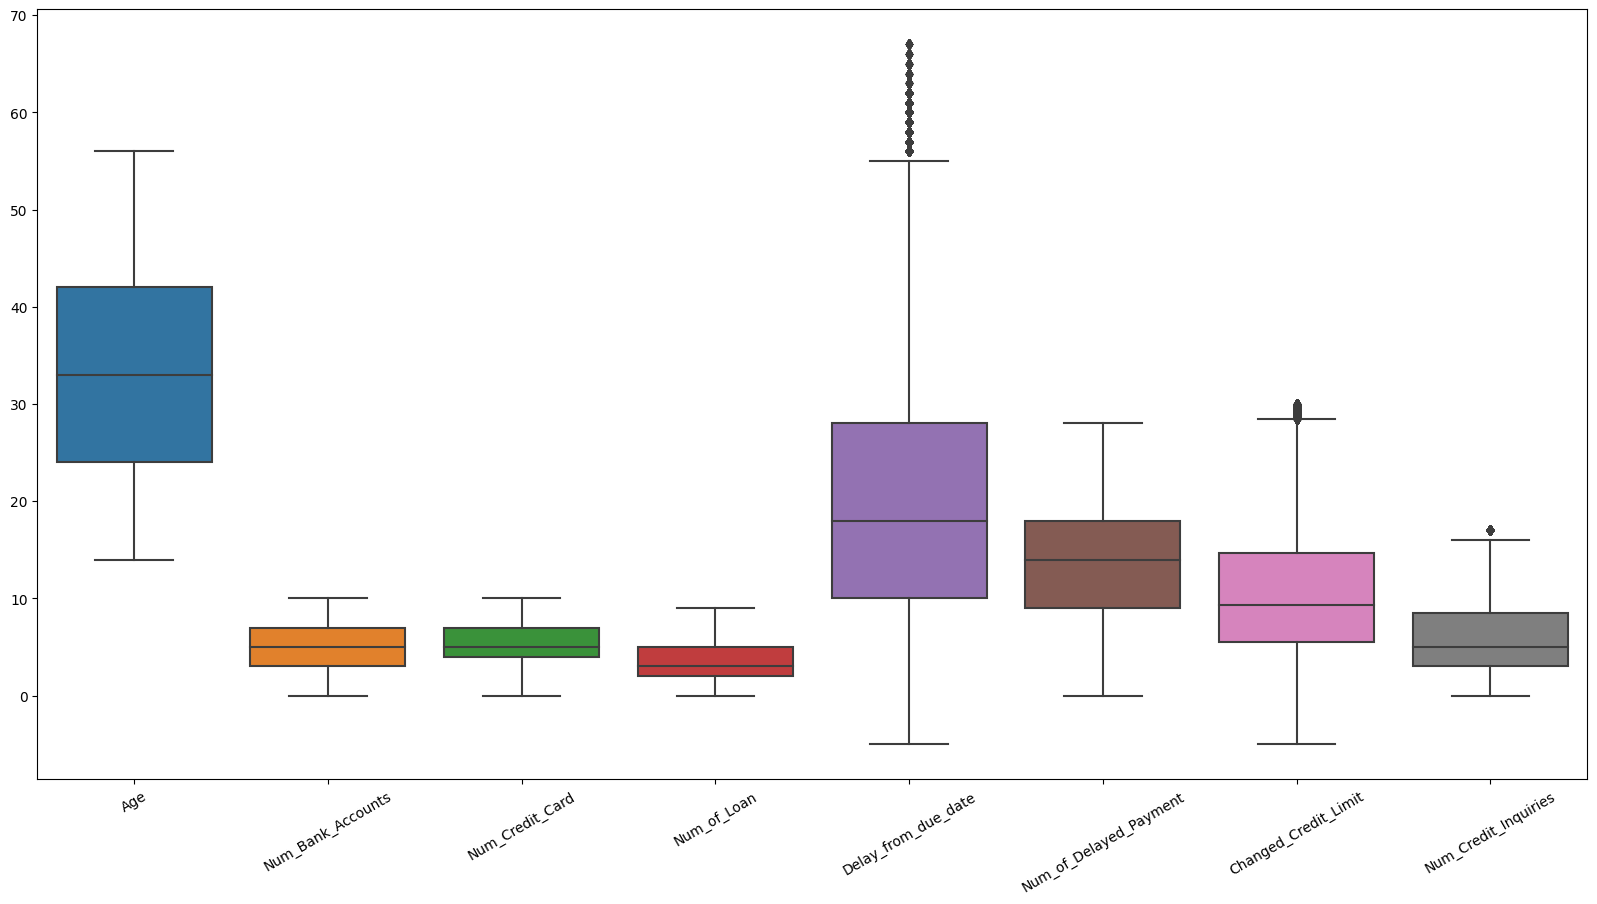

In [93]:
plt.figure(figsize=(20,10))
sns.boxplot(df[a1])
plt.xticks(rotation=30)
plt.show()

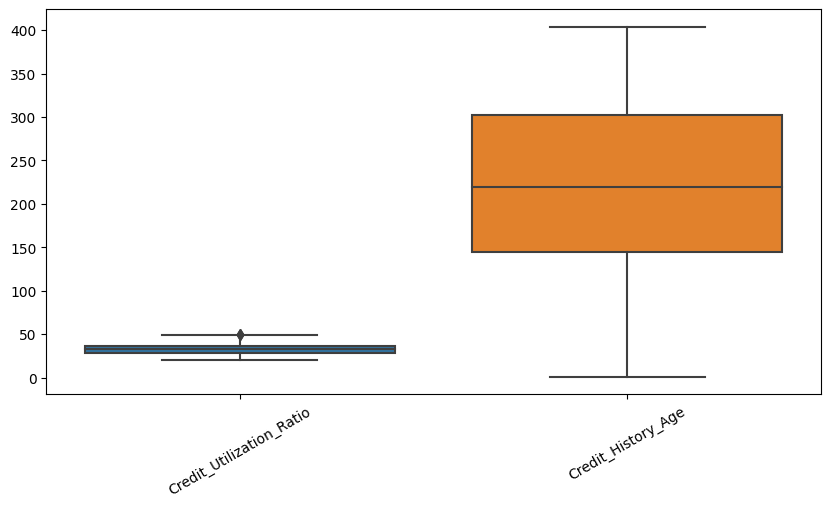

In [94]:
plt.figure(figsize=(10,5))
sns.boxplot(df[a2])
plt.xticks(rotation=30)
plt.show()

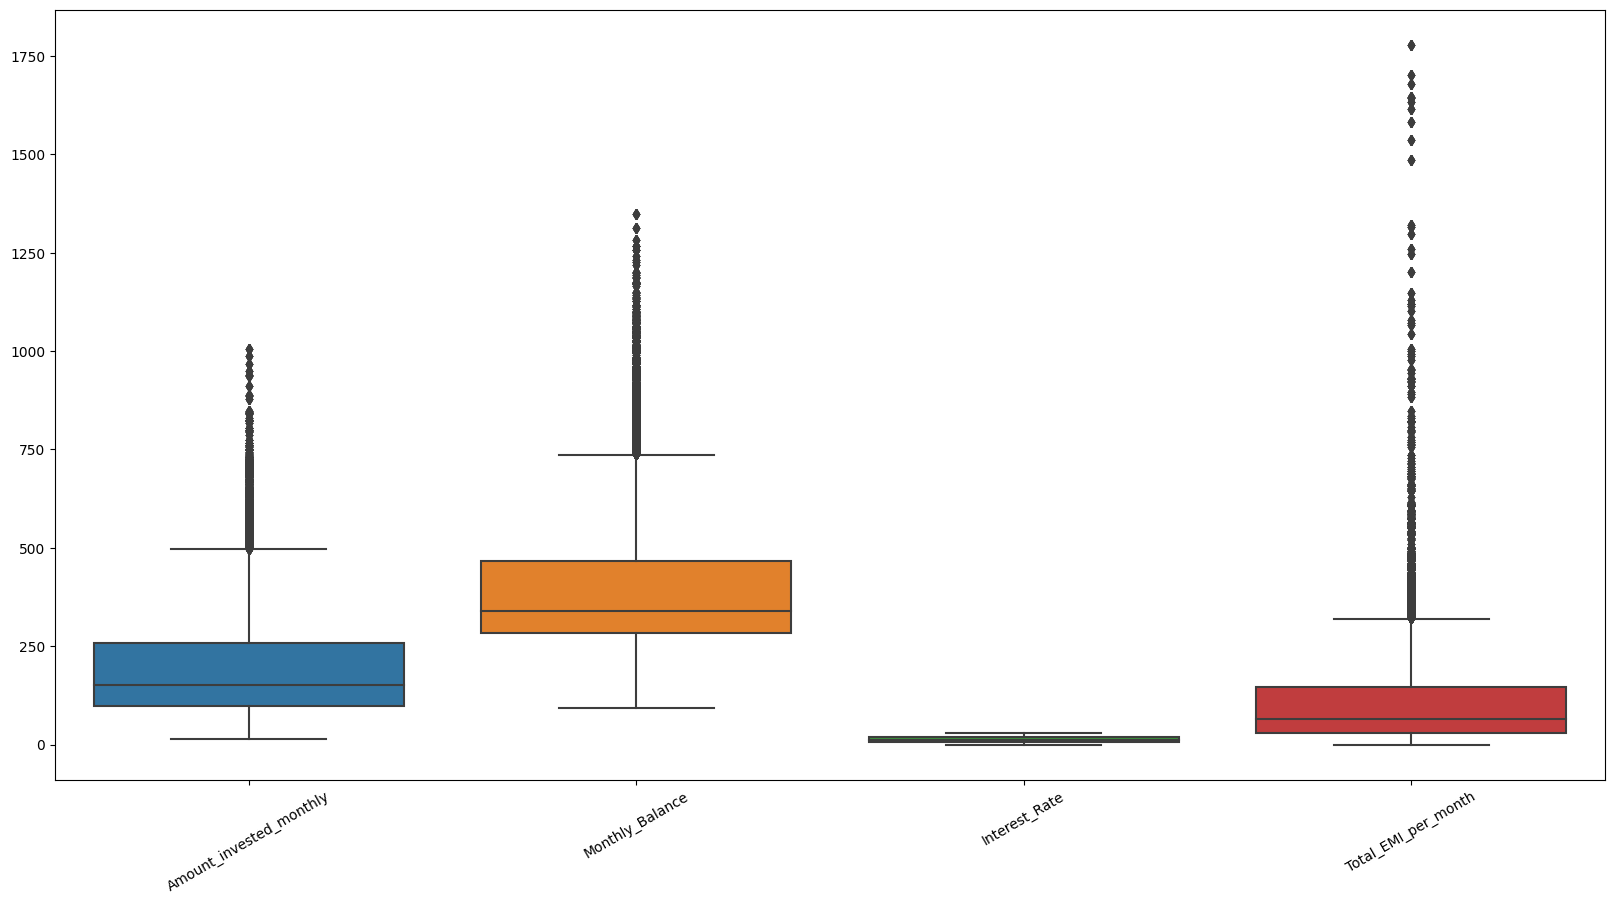

In [95]:
plt.figure(figsize=(20,10))
sns.boxplot(df[a3])
plt.xticks(rotation=30)
plt.show()

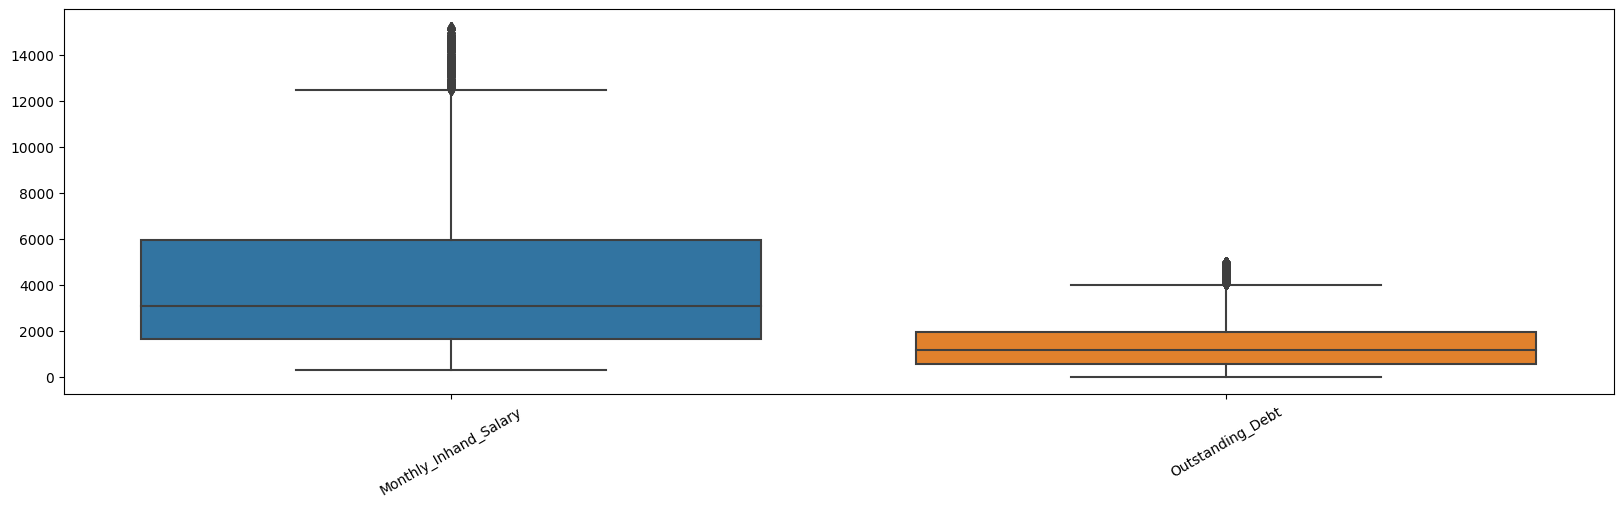

In [96]:
plt.figure(figsize=(20,5))
sns.boxplot(df[a4])
plt.xticks(rotation=30)
plt.show()

In [97]:


# This code defines a function called 'remove_out' that takes three parameters:
# 'df_clean' (the DataFrame to be cleaned), 'num_cols' (a list of numerical columns in the DataFrame), and optional parameters
# 'lbv ('lower bound value) and 'hbv' (upper) value bound with default values of 0.25 and 0.75 respectively.
# Inside the function, it calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for each numerical column specified in 'num_cols'.
#  It then calculates the lower bound (lb) and upper bound (hb) for outlier detection using the formula Q11-.5IQR and Q3+1.5IQR respectively.
# Next, it iterates over each numerical column and filters the DataFrame 'df_clean' to remove rows where the values
#  in that column are outside the range defined by the lower bound (lb) and upper bound (hb).
# Finally, it returns the cleaned DataFrame_cleandf '' after removing the outliers.

In [98]:
def remove_out(df_clean, num_cols, lbv=0.25, hbv=0.75):
    Q1 = df_clean[num_cols].quantile(lbv)
    Q3 = df_clean[num_cols].quantile(hbv)
    IQR = Q3-Q1
    lb = Q1-1.5*IQR
    hb = Q3+1.5*IQR
    for i in num_cols:
        df_clean = df_clean[(df_clean[i]>=lb[i]) & (df_clean[i]<=hb[i])]
    return df_clean

In [99]:
cols = ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
        'Amount_invested_monthly', 'Monthly_Balance', 'Interest_Rate', 'Annual_Income']

In [100]:
df = remove_out(df, cols, lbv=0.2, hbv=0.9)
df.shape

(98826, 21)

In [101]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Interest_Rate,Total_EMI_per_month
0,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,...,809.98,26.822620,265.0,No,98.35409,High_spent_Small_value_payments,304.555294,Good,3.0,49.574949
1,23.0,19114.12,1824.843333,3.0,4.0,4.0,-1,4.0,11.27,4.0,...,809.98,31.944960,265.0,No,98.35409,Low_spent_Large_value_payments,304.555294,Good,3.0,49.574949
2,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,...,809.98,28.609352,267.0,No,98.35409,Low_spent_Medium_value_payments,304.555294,Good,3.0,49.574949
3,23.0,19114.12,1824.843333,3.0,4.0,4.0,5,4.0,11.27,4.0,...,809.98,31.377862,268.0,No,98.35409,Low_spent_Small_value_payments,304.555294,Good,3.0,49.574949
4,23.0,19114.12,1824.843333,3.0,4.0,4.0,6,4.0,11.27,4.0,...,809.98,24.797347,269.0,No,98.35409,High_spent_Medium_value_payments,304.555294,Good,3.0,49.574949


# **Data Preprocessing**

In [102]:
cat_df = df.select_dtypes('category')
num_df = df.select_dtypes(exclude='category')

In [103]:
for c in cat_df.columns:
  print(c)
  print(df[c].unique())
  print()

Credit_Mix
['Good', 'Standard', 'Bad']
Categories (3, object): ['Bad', 'Good', 'Standard']

Payment_of_Min_Amount
['No', 'NM', 'Yes']
Categories (3, object): ['NM', 'No', 'Yes']

Payment_Behaviour
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']
Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments',
                         'High_spent_Small_value_payments', 'Low_spent_Large_value_payments',
                         'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments']

Credit_Score
['Good', 'Standard', 'Poor']
Categories (3, object): ['Good', 'Poor', 'Standard']



In [104]:
df['Credit_Mix'] = df['Credit_Mix'].map({'Bad': 0, 'Standard': 1, 'Good': 2})
df['Credit_Score'] = df['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

In [105]:
df['Credit_Mix'] = df['Credit_Mix'].astype('int')
df['Credit_Score'] = df['Credit_Score'].astype('int')

In [106]:
df['Payment_of_Min_Amount'].value_counts()

Yes    51788
No     35153
NM     11885
Name: Payment_of_Min_Amount, dtype: int64

In [107]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      27482
High_spent_Medium_value_payments    19153
High_spent_Large_value_payments     15138
Low_spent_Medium_value_payments     14426
High_spent_Small_value_payments     11847
Low_spent_Large_value_payments      10780
Name: Payment_Behaviour, dtype: int64

In [108]:
# pandas.get_dummies -> Convert categorical variable into dummy/indicator variables.

In [109]:
dummy_df = pd.get_dummies(df[['Payment_Behaviour', 'Payment_of_Min_Amount']], drop_first=True)

df = pd.concat([df, dummy_df], axis=1)
df = df.drop(['Payment_Behaviour', 'Payment_of_Min_Amount'], axis=1)

In [110]:
dummy_df.head()

,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0
2,0,0,0,1,0,1,0
3,0,0,0,0,1,1,0
4,1,0,0,0,0,1,0


In [111]:
df.head(5)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Interest_Rate,Total_EMI_per_month,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,...,2,3.0,49.574949,0,1,0,0,0,1,0
1,23.0,19114.12,1824.843333,3.0,4.0,4.0,-1,4.0,11.27,4.0,...,2,3.0,49.574949,0,0,1,0,0,1,0
2,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,...,2,3.0,49.574949,0,0,0,1,0,1,0
3,23.0,19114.12,1824.843333,3.0,4.0,4.0,5,4.0,11.27,4.0,...,2,3.0,49.574949,0,0,0,0,1,1,0
4,23.0,19114.12,1824.843333,3.0,4.0,4.0,6,4.0,11.27,4.0,...,2,3.0,49.574949,1,0,0,0,0,1,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 98826 non-null  float64
 1   Annual_Income                                       98826 non-null  float64
 2   Monthly_Inhand_Salary                               98826 non-null  float64
 3   Num_Bank_Accounts                                   98826 non-null  float64
 4   Num_Credit_Card                                     98826 non-null  float64
 5   Num_of_Loan                                         98826 non-null  float64
 6   Delay_from_due_date                                 98826 non-null  int64  
 7   Num_of_Delayed_Payment                              98826 non-null  float64
 8   Changed_Credit_Limit                                98826 non-null  float64


**Data Spliting**

In [113]:
XX = df.drop("Credit_Score", axis=1)
yy = df["Credit_Score"]

In [114]:
# In simple terms, code the `sm = SMOTE()` is creating an object called `sm` that represents a technique called SMOTE (Synthetic Minority Over-sampling Technique).

# SMOTE is used when we have imbalanced data, meaning that one class has significantly fewer samples than the other class.
# It helps to balance the classes by creating synthetic (artificial) samples for the minority class.

# For example, let's say have we a dataset with 100 samples, where 90 samples belong to Class A and only 10 samples belong to Class B.
#  This is an imbalanced dataset. SMOTE will create new samples for Class B by combining existing samples in a way that maintains the characteristics of the minority class.
#   This way we, end up with a balanced dataset where both classes number equal an have of samples.

# The `sm` object created using `SMOTE()` can be used to apply this technique to our dataset and generate the synthetic samples.

In [115]:
sm = SMOTE()
X, y = sm.fit_resample(XX, yy)

In [116]:
X.shape

(157587, 25)

In [117]:
y.shape

(157587,)

In [118]:
y.value_counts()

2    52529
1    52529
0    52529
Name: Credit_Score, dtype: int64

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, train_size=0.8, random_state=123
)

**Scaling**

In [120]:
num_columns = list(num_df.columns)

In [121]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True)
# A PowerTransformer is a technique used to transform data to follow a more Gaussian (normal) distribution.
# It is commonly used when the data is skewed or does not have a symmetric distribution.

In [122]:
X_train[num_columns] = scalar.fit_transform(X_train[num_columns])
X_test[num_columns] = scalar.transform(X_test[num_columns])

# **Model Building**

In [123]:
xgb_cl = XGBClassifier(
 learning_rate=0.1,
 n_estimators=250,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 n_jobs=-1,
 tree_method='gpu_hist'
)



- `learning_rate`: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. Values must be in the range [0.0, inf).
- `n_estimators`: determines It the number of boosting iterations (trees) to be built. More trees can improve the model's performance, but it also increases the training time.
- `max_depth`: It sets the maximum depth of each tree in the ensemble. A higher value can make the model more complex and prone to overfitting, a while lower value can make it simpler and more biased.
- `min_child_weight`: It sets the minimum sum of instance weight (hessian) needed in a child node. It helps control overfitting by adding regularization and preventing the creation of child nodes with very few instances.
 `-gamma It`: sets the minimum loss reduction required to make a further partition on a leaf node. It helps control overfitting by adding regularization preventing and unnecessary splits.
- `subsample`: It sets the fraction of samples used for training each tree. A value less than 1.0 introduces randomness and reduces overfitting by training on a subset of the data.
- `n_jobs`: It sets the number of parallel threads to use for training. A value of -1 means to use all available threads, which can speed up the training process.
- `tree_method`: It specifies the method to use for building trees. 'gpu_hist' indicates that the GPU will be used for computation, which can significantly speed up training compared to the CPU.



https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [124]:
%%time
xgb_cl.fit(X_train,y_train)

CPU times: user 5.22 s, sys: 351 ms, total: 5.57 s
Wall time: 6.52 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [125]:
y_pred_test = xgb_cl.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8645535884256615

In [126]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10506
           1       0.85      0.76      0.80     10506
           2       0.88      0.93      0.91     10506

    accuracy                           0.86     31518
   macro avg       0.86      0.86      0.86     31518
weighted avg       0.86      0.86      0.86     31518



In [127]:
a = {'Poor': 0, 'Standard': 1, 'Good': 2}
list(a.keys())

['Poor', 'Standard', 'Good']

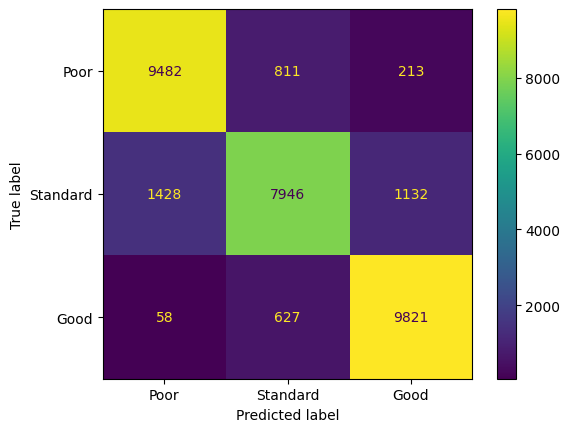

In [128]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(a.keys()))
disp.plot()